In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startup_data=pd.read_csv("50_Startups.csv")
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#EDA
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data=startup_data.rename({'R&D Spend' :'RDS','Administration':'ADM','Marketing Spend':'MRKTS'},axis=1)
data.head()

,RDS,ADM,MRKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#check null value
data.isna().sum()

RDS       0
ADM       0
MRKTS     0
State     0
Profit    0
dtype: int64

In [6]:
data.corr()

,RDS,ADM,MRKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MRKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


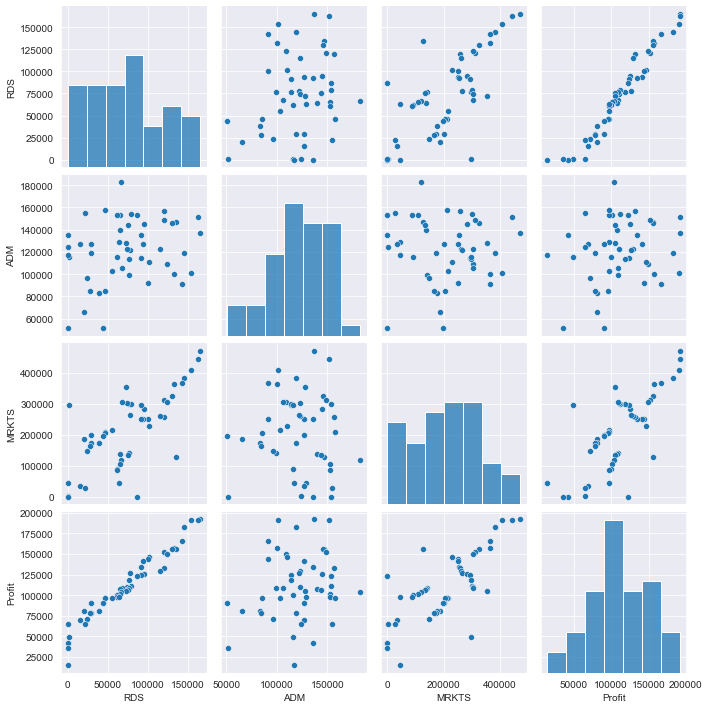

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [8]:
#nodel building
model=smf.ols("Profit~RDS+ADM+MRKTS",data=data).fit()

In [9]:
#testing
#Coefficient of parameter
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MRKTS            0.027228
dtype: float64

In [10]:
#tvalue and pvalue
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADM          -0.525507
 MRKTS         1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADM          0.60176
 MRKTS        0.10472
 dtype: float64)

In [11]:
#R squared value
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        19:39:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MRKTS          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#build SLR and MLR model for ADM & MRKTS variablews
#tvalues,pvalues
slr_adm=smf.ols("Profit~ADM",data=data).fit()
slr_adm.tvalues,slr_adm.pvalues

(Intercept    3.040044
 ADM          1.419493
 dtype: float64,
 Intercept    0.003824
 ADM          0.162217
 dtype: float64)

In [14]:
slr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 02 Jan 2022   Prob (F-statistic):              0.162
Time:                        19:39:51   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
slr_mrkts=smf.ols("Profit~MRKTS",data=data).fit()
slr_mrkts.tvalues,slr_mrkts.pvalues

(Intercept    7.808356
 MRKTS        7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MRKTS        4.381073e-10
 dtype: float64)

In [16]:
slr_mrkts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           4.38e-10
Time:                        19:39:52   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MRKTS          0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
slr_adm_mrkts=smf.ols("Profit~ADM+MRKTS",data=data).fit()
slr_adm_mrkts.tvalues,slr_adm_mrkts.pvalues

(Intercept    1.142741
 ADM          2.467779
 MRKTS        8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADM          1.729198e-02
 MRKTS        9.727245e-11
 dtype: float64)

In [18]:
slr_adm_mrkts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           2.50e-10
Time:                        19:39:54   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MRKTS          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#model validation 2 techniques
# 1) Checking Collinearity Problem
# VIF = 1/(1-Rsquare) for all independent variables
rsq_rds=smf.ols("RDS~ADM+MRKTS",data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols("ADM~RDS+MRKTS",data=data).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mrkts=smf.ols("MRKTS~RDS+ADM",data=data).fit().rsquared
vif_mrkts=1/(1-rsq_mrkts)
# Putting the values in Dataframe format
d1={'Variables':['RDS','ADM','MRKTS'],'Vif':[vif_rds,vif_adm,vif_mrkts]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MRKTS,2.326773


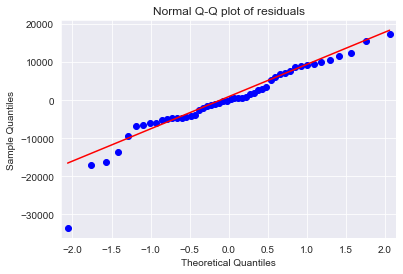

In [20]:
#VIF>20 no collinearity,so concider all veriable is linear regression equation
#2) residual Analysis
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
#outlier 
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [22]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

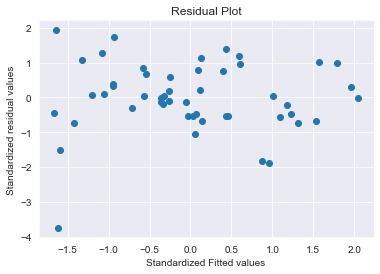

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

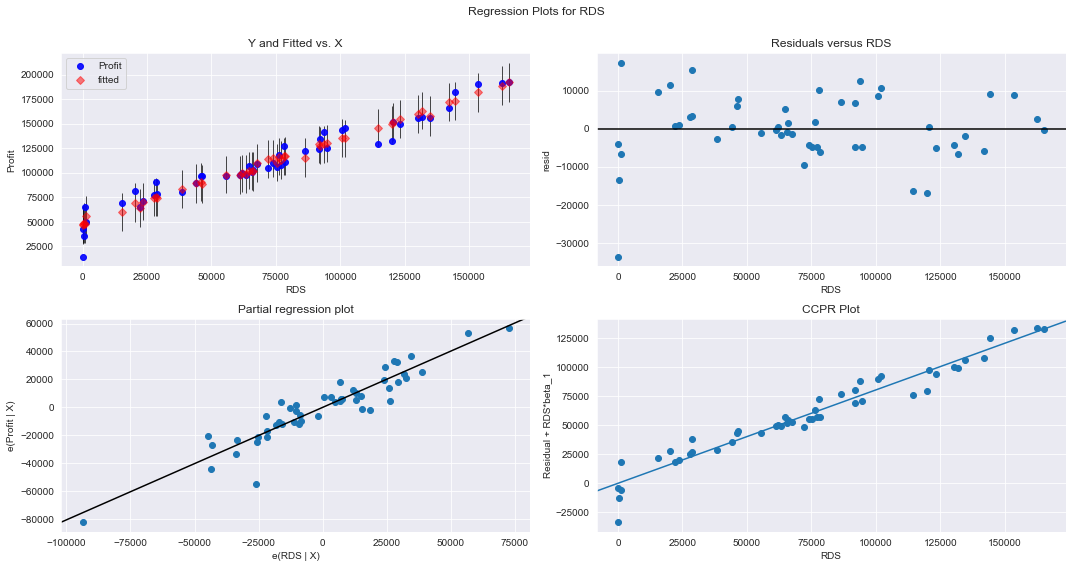

In [24]:
#Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()


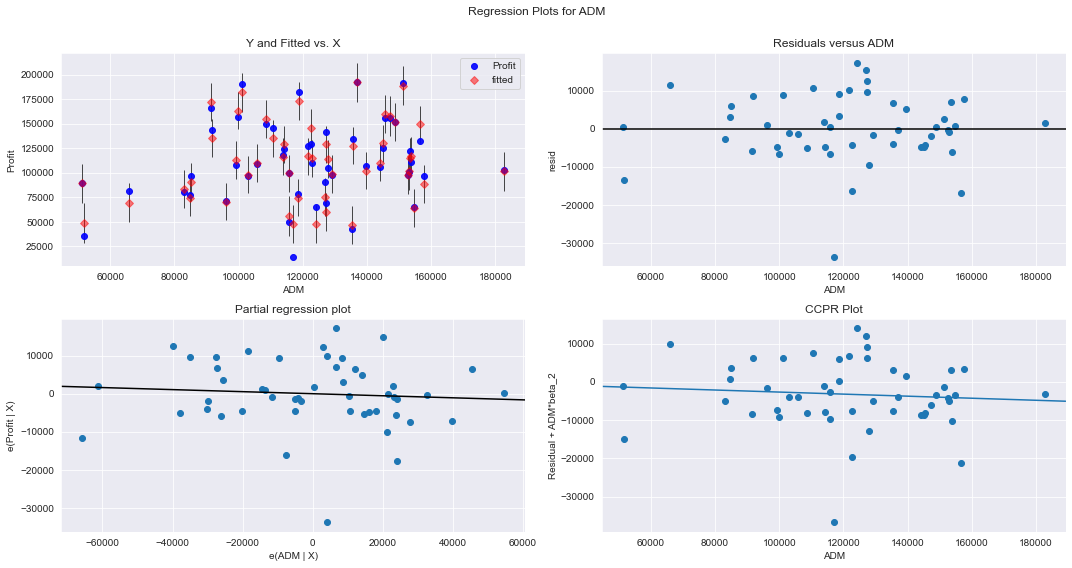

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

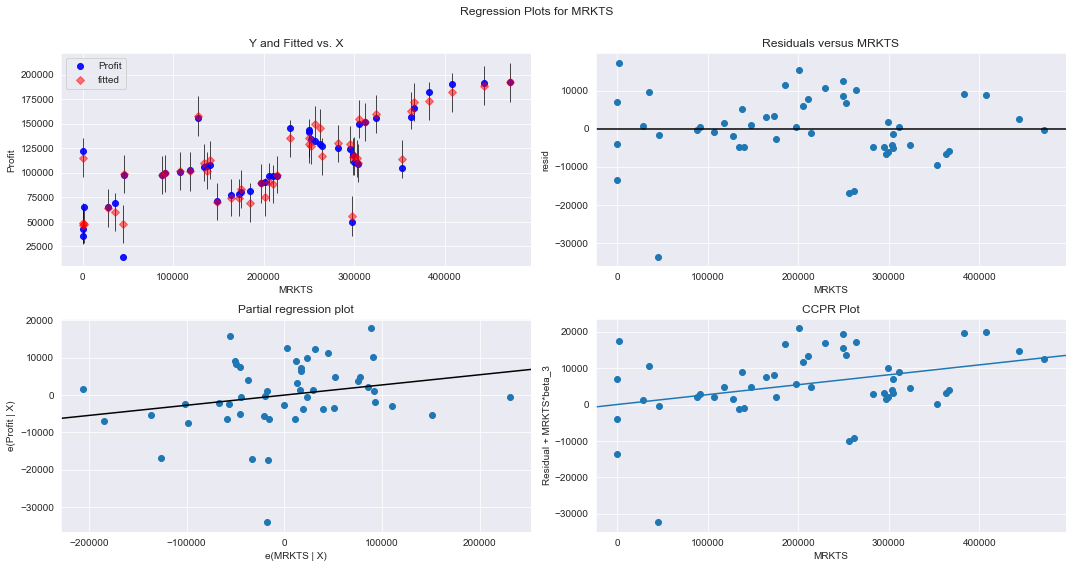

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "MRKTS", fig=fig)
plt.show()

In [27]:
#Model Deletion Diagnostics :checking Outliers or Influencers
#1) Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c


array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

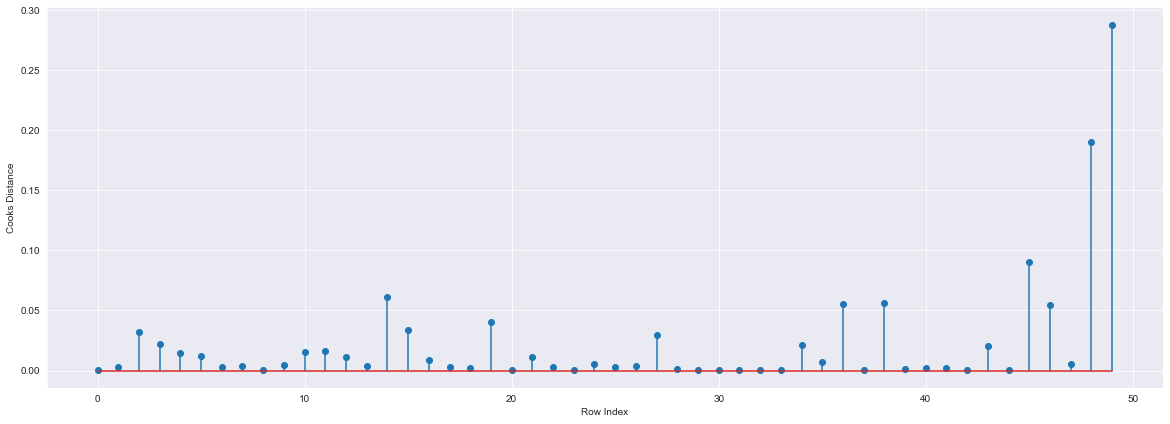

In [28]:
#Plot the influencers values using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

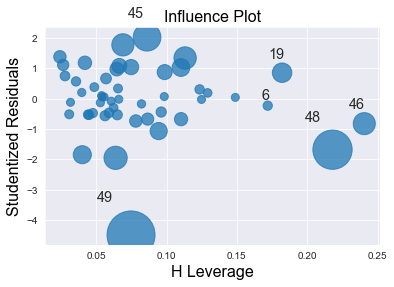

In [30]:
#High Influence points
#2) Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [31]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [32]:
data[data.index.isin([49])] 

,RDS,ADM,MRKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [33]:
#Improving the Model
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1

,RDS,ADM,MRKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
#final Model
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADM+MRKTS",data=data1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data1
else:
    final_model=smf.ols("Profit~RDS+ADM+MRKTS",data=data1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [35]:
final_model.rsquared

0.9613162435129847

In [36]:
data1

,RDS,ADM,MRKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
#Model Predictions
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADM":90000,"MRKTS":140000},index=[0])
new_data


,RDS,ADM,MRKTS
0,70000,90000,140000


In [38]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [39]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [40]:
#table containing R^2 value for each prepared model
d2={'Pred_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Pred_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
